In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Import Data sets

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
train.shape

(891, 12)

In [5]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
test.shape

(418, 11)

'Survived' is the target variable, so test data set doesn't have it.

In [8]:
print("test data is "+str((test.shape[0]/(train.shape[0]+test.shape[0]))*100)+"% of total data")

test data is 31.932773109243694% of total data


In [9]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Now, let's look at some real data

In [10]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# Exploratory Data Analysis

Our target variable is 'Survived' (0 or 1) and the others are input variables (= features)    
The input variables can be classified as follows:

* Continuous variables : Fare
* Categorical variables : Pclass, Sex, Embarked
* Ordinal variables : PassengerId, Age, SibSp, Parch
* String variables : Name, Ticket, Cabin

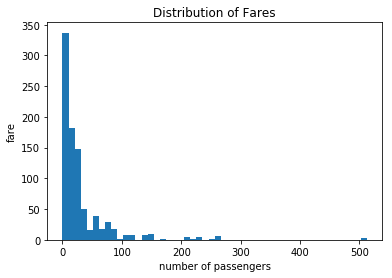

In [11]:
plt.hist(train['Fare'], bins=50)
plt.xlabel('number of passengers')
plt.ylabel('fare')
plt.title('Distribution of Fares')
plt.show()

In [12]:
train.groupby('Sex')['PassengerId'].count()

Sex
female    314
male      577
Name: PassengerId, dtype: int64

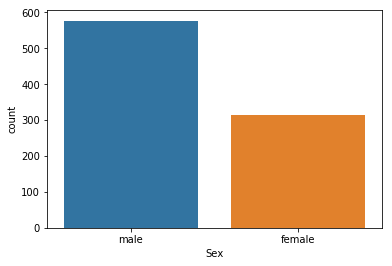

In [13]:
sns.countplot('Sex', data=train)
plt.show()

In [14]:
train.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

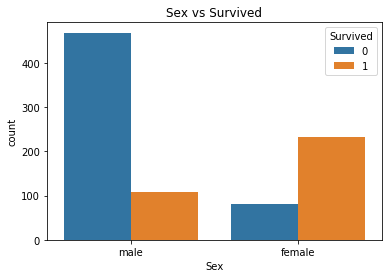

In [15]:
sns.countplot('Sex', hue='Survived', data=train)
plt.title('Sex vs Survived')
plt.show()

To change the chart style, let's define the function:

In [16]:
def survival_bar(input):
    survived = train[train['Survived']==1][input].value_counts()
    dead = train[train['Survived']==0][input].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind='bar', stacked=True)

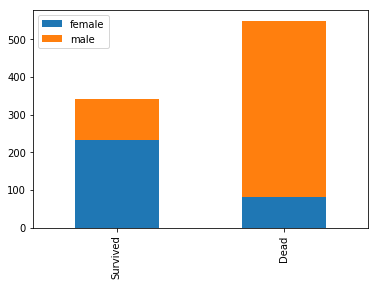

In [17]:
survival_bar('Sex')

We can see the same bar chart as stacked style.  
From the above chart, we can see male are more likey to die than female. 

In [18]:
train.groupby('Pclass')['PassengerId'].count()

Pclass
1    216
2    184
3    491
Name: PassengerId, dtype: int64

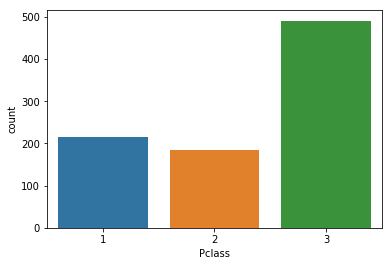

In [19]:
sns.countplot('Pclass', data=train)
plt.show()

In [20]:
train.groupby(['Pclass','Survived'])['Survived'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

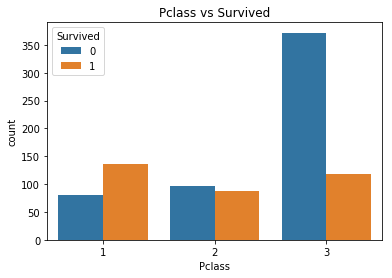

In [21]:
sns.countplot('Pclass', hue='Survived', data=train)
plt.title('Pclass vs Survived')
plt.show()

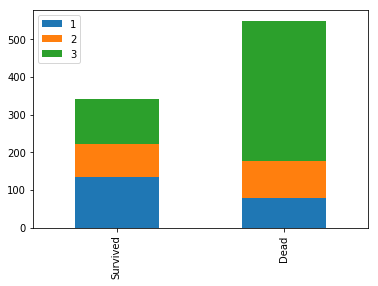

In [22]:
survival_bar('Pclass')

From the above chart, we can see the 1st flass passengers are more likely to survive but on the contrary, 3rd class passengers are more likely to die.

Now, let's see our last categorical variable : Embarked

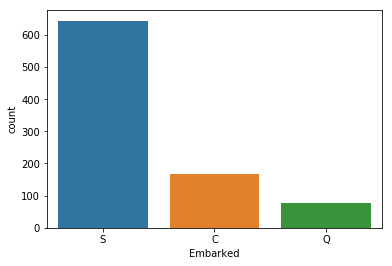

In [23]:
sns.countplot('Embarked', data=train)
plt.show()

We can see the most passengers were embarked at S.

In [24]:
train['Embarked'] = train['Embarked'].fillna('S')

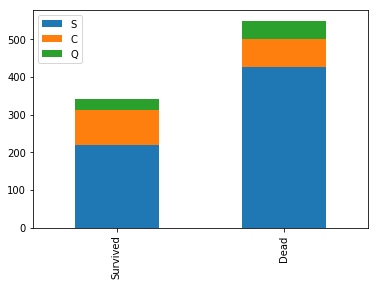

In [25]:
survival_bar('Embarked')

We can see the passengers embarked at S are more likely to die.  
To see if there is some relation between 'Embarked' and 'Pclass', let's check the correlation.

In [26]:
train.groupby(['Pclass','Embarked'])['Embarked'].count()

Pclass  Embarked
1       C            85
        Q             2
        S           129
2       C            17
        Q             3
        S           164
3       C            66
        Q            72
        S           353
Name: Embarked, dtype: int64

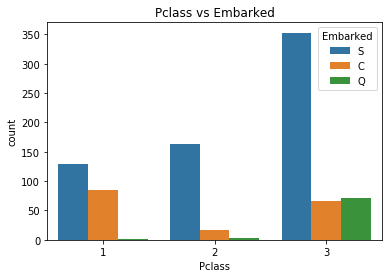

In [27]:
sns.countplot('Pclass', hue='Embarked', data=train)
plt.title('Pclass vs Embarked')
plt.show()

Yes. Passengers embarked at S were mostly seated in 3rd class.   
It explains the high fatality for S with the fact that most passengers were embarked at S.

In [28]:
#train.loc[train['Embarked'] == 'S', 'Embarked'] = 0
#train.loc[train['Embarked'] == 'C', 'Embarked'] = 1
#train.loc[train['Embarked'] == 'Q', 'Embarked'] = 2

embarked_mapping = {"S": 0, "C": 1, "Q": 2}
train['Embarked'] = train['Embarked'].map(embarked_mapping)

In [29]:
corr_matrix = train.corr()
corr_matrix["Survived"].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Embarked       0.106811
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

Oops, Sex is not included because it isn't numerical variable, let's convert it into integer variable:

In [30]:
sex_mapping = {"male": 0, "female": 1}
train['Sex'] = train['Sex'].map(sex_mapping)

In [31]:
corr_matrix = train.corr()
corr_matrix["Survived"].sort_values(ascending=False)

Survived       1.000000
Sex            0.543351
Fare           0.257307
Embarked       0.106811
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

From above, Fare, Plcass, Sex have meaningful correlation with Survived as we saw above.

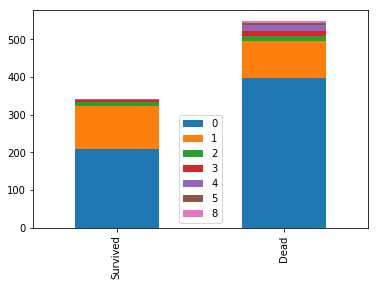

In [32]:
survival_bar('SibSp')

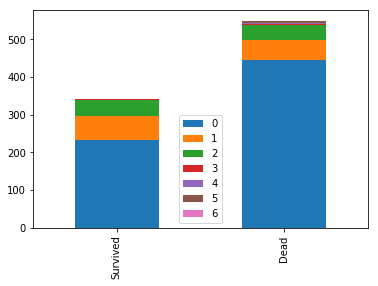

In [33]:
survival_bar('Parch')

From above two charts, sole travelers are more likely to die.

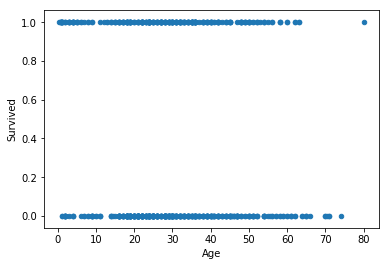

In [34]:
train.plot(kind="scatter", x="Age", y="Survived")

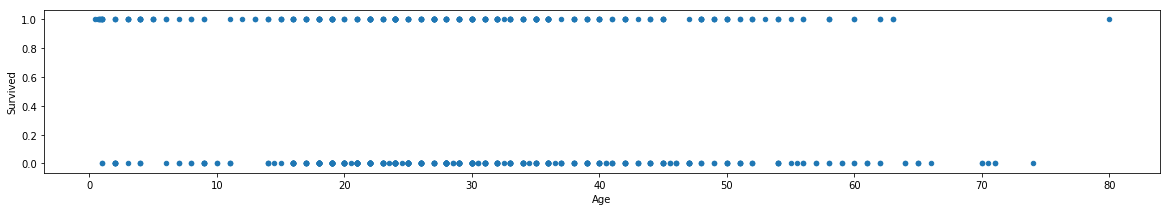

In [35]:
train.plot(kind="scatter", x="Age", y="Survived", figsize=(20,3))

From the above plot, I cannot find any meaningful relation between Age and Survived.

Let's convert Age into categorical variable and assign integers like this:
          * Child : Age <= 10 -> 0
          * Junior : 10 < Age <= 20 -> 1
          * Adult : 20 < Age <= 40 -> 2
          * Senior : 40 < Age <= 60 -> 3
          * Old : 60 < Age -> 4

In [36]:
train.loc[train['Age'] <= 10, 'Age'] = 0,
train.loc[(train['Age'] > 10) & (train['Age'] <= 20), 'Age'] = 1,
train.loc[(train['Age'] > 20) & (train['Age'] <= 40), 'Age'] = 2,
train.loc[(train['Age'] > 40) & (train['Age'] <= 60), 'Age'] = 3,
train.loc[train['Age'] > 60, 'Age'] = 4

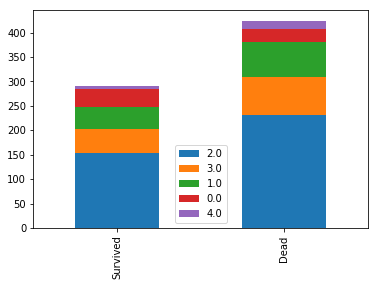

In [37]:
survival_bar('Age')

After conversion, we can see children are more likely to survive.

In [38]:
corr_matrix = train.corr()
corr_matrix["Survived"].sort_values(ascending=False)

Survived       1.000000
Sex            0.543351
Fare           0.257307
Embarked       0.106811
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.098607
Pclass        -0.338481
Name: Survived, dtype: float64

In [39]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,2.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,2.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,2.0,0,0,373450,8.0500,NaN,0
5,6,0,3,"Moran, Mr. James",0,NaN,0,0,330877,8.4583,NaN,2
6,7,0,1,"McCarthy, Mr. Timothy J",0,3.0,0,0,17463,51.8625,E46,0
7,8,0,3,"Palsson, Master. Gosta Leonard",0,0.0,3,1,349909,21.0750,NaN,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,2.0,0,2,347742,11.1333,NaN,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,1.0,1,0,237736,30.0708,NaN,1


# Missing value control

Among meaningful features, Age and Embarked have missing values.  
In the above when we analyze Embarked we simply imputed 'S' for missing values because most passengers were embarked at S.  
For Age I decided to apply the median age for each title group which is contained in Name. 

In [40]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null int64
dtypes: float64(2), int64(7), object(3)
memory usage: 83.6+ KB


In [41]:
train['Title'] = train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [42]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Don           1
Sir           1
Mme           1
Jonkheer      1
Ms            1
Capt          1
Countess      1
Lady          1
Name: Title, dtype: int64

In [43]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
train['Title'] = train['Title'].map(title_mapping)

In [44]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null int64
Title          891 non-null int64
dtypes: float64(2), int64(8), object(3)
memory usage: 90.6+ KB


In [45]:
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)

In [46]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
dtype: int64

Cabin is a meaningless feature, we don't need to take care of missing values.

Before applying prediction models, we need to discard useless features:

In [47]:
train_prepared = train.drop('Survived', axis=1)
train_label = train['Survived'].copy()

In [48]:
train_prepared = train_prepared.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [49]:
train_prepared.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Pclass      891 non-null int64
Sex         891 non-null int64
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null int64
Title       891 non-null int64
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


In [50]:
train_prepared.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,0,2.0,1,0,7.2500,0,0
1,1,1,2.0,1,0,71.2833,1,2
2,3,1,2.0,0,0,7.9250,0,1
3,1,1,2.0,1,0,53.1000,0,2
4,3,0,2.0,0,0,8.0500,0,0
5,3,0,2.0,0,0,8.4583,2,0
6,1,0,3.0,0,0,51.8625,0,0
7,3,0,0.0,3,1,21.0750,0,3
8,3,1,2.0,0,2,11.1333,0,2
9,2,1,1.0,1,0,30.0708,1,2


# Prediction Modeling

### Random Forest Classifier

In [51]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 100,random_state = 42)
score = cross_val_score(rfc, train_prepared, train_label, cv=10, n_jobs=1, scoring='accuracy')
print(score)

[0.75555556 0.82222222 0.75280899 0.83146067 0.85393258 0.86516854
 0.78651685 0.79775281 0.80898876 0.86363636]


In [52]:
round(np.mean(score)*100, 2)

81.38

# Testing

### Preparing Test Data

Before applying the prediction model, we need to prepare test data as we did for train data.

In [53]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Oops! There is a missing value in Fare. In training data set there was no missing value in Fare.  
I will impute median value for each Pclass because Fare is closely related to Pclass.

In [54]:
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)

In [55]:
test['Title'] = test['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [56]:
test['Title'] = test['Title'].map(title_mapping)

In [57]:
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace=True)

In [58]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
Title            0
dtype: int64

In [59]:
test.loc[test['Age'] <= 10, 'Age'] = 0,
test.loc[(test['Age'] > 10) & (test['Age'] <= 20), 'Age'] = 1,
test.loc[(test['Age'] > 20) & (test['Age'] <= 40), 'Age'] = 2,
test.loc[(test['Age'] > 40) & (test['Age'] <= 60), 'Age'] = 3,
test.loc[test['Age'] > 60, 'Age'] = 4

In [60]:
sex_mapping = {"male": 0, "female": 1}
test['Sex'] = test['Sex'].map(sex_mapping)

In [61]:
embarked_mapping = {"S": 0, "C": 1, "Q": 2}
test['Embarked'] = test['Embarked'].map(embarked_mapping)

In [62]:
test['Embarked'] = test['Embarked'].fillna('S')

In [63]:
test_prepared = test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1).copy()

### Making Submission File

In [64]:
rfc = RandomForestClassifier(n_estimators = 100,random_state = 42)
rfc.fit(train_prepared, train_label)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [65]:
prediction = rfc.predict(test_prepared)

In [66]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": prediction
    })

submission.to_csv('submission.csv', index=False)